In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns
import numpy as np

In [2]:
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = 'SimHei.ttf'  # 替换为你的字体文件路径
font = FontProperties(fname=font_path, size=12)

In [3]:
filepath = 'preprocessed_supermarket.xlsx'
df = pd.read_excel(filepath)
print(df)

       利润率         制造商   产品名称    利润       发货日期  地区  城市  子类别   折扣  数量 省/自治区  \
0    -0.47     Fiskars     剪刀   -61 2016-04-29  华东  杭州   用品  0.4   2    浙江   
1     0.34   GlobeWeis   搭扣信封    43 2016-06-19  西南  内江   信封  0.0   2    四川   
2     0.13    Cardinal  孔加固材料     4 2016-06-19  西南  内江  装订机  0.4   2    四川   
3    -0.08    Kleencut    开信刀   -27 2016-12-13  华东  镇江   用品  0.4   4    江苏   
4     0.40  KitchenAid    搅拌机   550 2015-06-02  中南  汕头   器具  0.0   3    广东   
...    ...         ...    ...   ...        ...  ..  ..  ...  ...  ..   ...   
9930 -0.33     SanDisk    记忆卡  -315 2016-06-02  华东  义乌   配件  0.4   3    浙江   
9931  0.08       Eldon      盘    36 2016-06-02  华东  义乌  收纳具  0.0   2    浙江   
9932 -0.37       Safco    折叠椅   -88 2016-06-02  华东  义乌   椅子  0.4   1    浙江   
9933 -0.33          罗技    路由器 -1617 2016-06-02  华东  义乌   配件  0.4   7    浙江   
9934 -0.48    Breville     冰箱 -3502 2013-12-06  华东  温州   器具  0.4   5    浙江   

        类别   细分       订单日期 邮寄方式   销售额 订单国家     订单编号 产品描述  
0   

In [5]:
print(df['细分'].drop_duplicates())

0       公司
1      消费者
10    小型企业
Name: 细分, dtype: object


## 各省份的消费单位

In [57]:
provinces = df['省/自治区'].drop_duplicates().tolist()
print(df['邮寄方式'].drop_duplicates())

0      二级
1     标准级
15     一级
66     当日
Name: 邮寄方式, dtype: object


In [54]:
province_second = {}
province_standard = {}
province_first = {}
province_day = {}
for i in range(df.shape[0]):
    if df["邮寄方式"][i] == "二级":
        if df["省/自治区"][i] not in province_second:
            province_second[df["省/自治区"][i]] = 1
        else:
            province_second[df["省/自治区"][i]] += 1
    elif df["邮寄方式"][i] == "标准级":
        if df["省/自治区"][i] not in province_standard:
            province_standard[df["省/自治区"][i]] = 1
        else:
            province_standard[df["省/自治区"][i]] += 1
    elif df["邮寄方式"][i] == "一级":
        if df["省/自治区"][i] not in province_first:
            province_first[df["省/自治区"][i]] = 1
        else:
            province_first[df["省/自治区"][i]] += 1
    else:
        if df["省/自治区"][i] not in province_day:
            province_day[df["省/自治区"][i]] = 1
        else:
            province_day[df["省/自治区"][i]] += 1

In [59]:
for province in provinces:
    if province not in province_second:
        province_second[province] = 0
    if province not in province_standard:
        province_standard[province] = 0
    if province not in province_first:
        province_first[province] = 0
    if province not in province_day:
        province_day[province] = 0

In [65]:
second = np.array(list(province_second.values()))
standard = np.array(list(province_standard.values()))
first = np.array(list(province_first.values()))
day = np.array(list(province_day.values()))

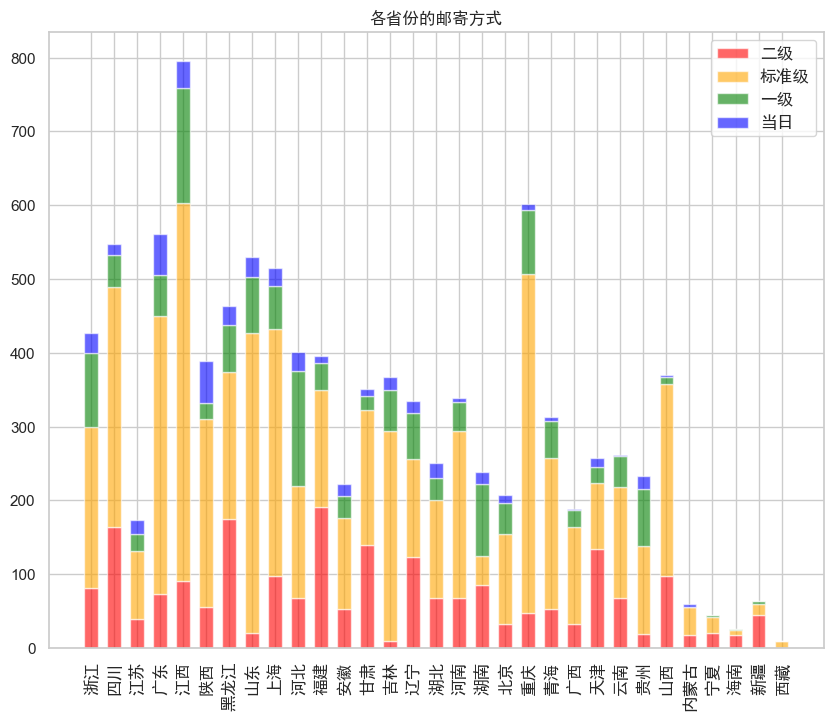

In [68]:
plt.figure(figsize=(10, 8))
width = 0.6
plt.bar(provinces,second,width,color='red' ,alpha=0.6, label="二级")
plt.bar(provinces, standard, width, bottom=second, color= 'orange', alpha=0.6, label="标准级")
plt.bar(provinces, first, width, bottom= (second+standard), color='green', alpha=0.6, label="一级")
plt.bar(provinces,day,width,bottom= (second+standard+first),color='blue' ,alpha=0.6, label="当日")
plt.xticks(fontproperties=font,rotation=90)
plt.title("各省份的邮寄方式",fontproperties=font)
legend = plt.legend()
for i in range(0,4):
    label = legend.get_texts()[i]
    label.set_fontproperties(font)
plt.show ()

## 消费类别

In [44]:
df2 = df[['子类别','数量','细分']].groupby(['子类别','细分'])['数量'].sum().reset_index()
pivot_df = df2.pivot(index='子类别', columns='细分', values='数量')

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 21496 (\N{CJK UNIFIED IDEOGRAPH-53F8}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.draw()
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20225 (\N{CJK UNIFIED IDEOGRAPH-4F01}) missing from current font.
  fig.canvas.draw()
/User

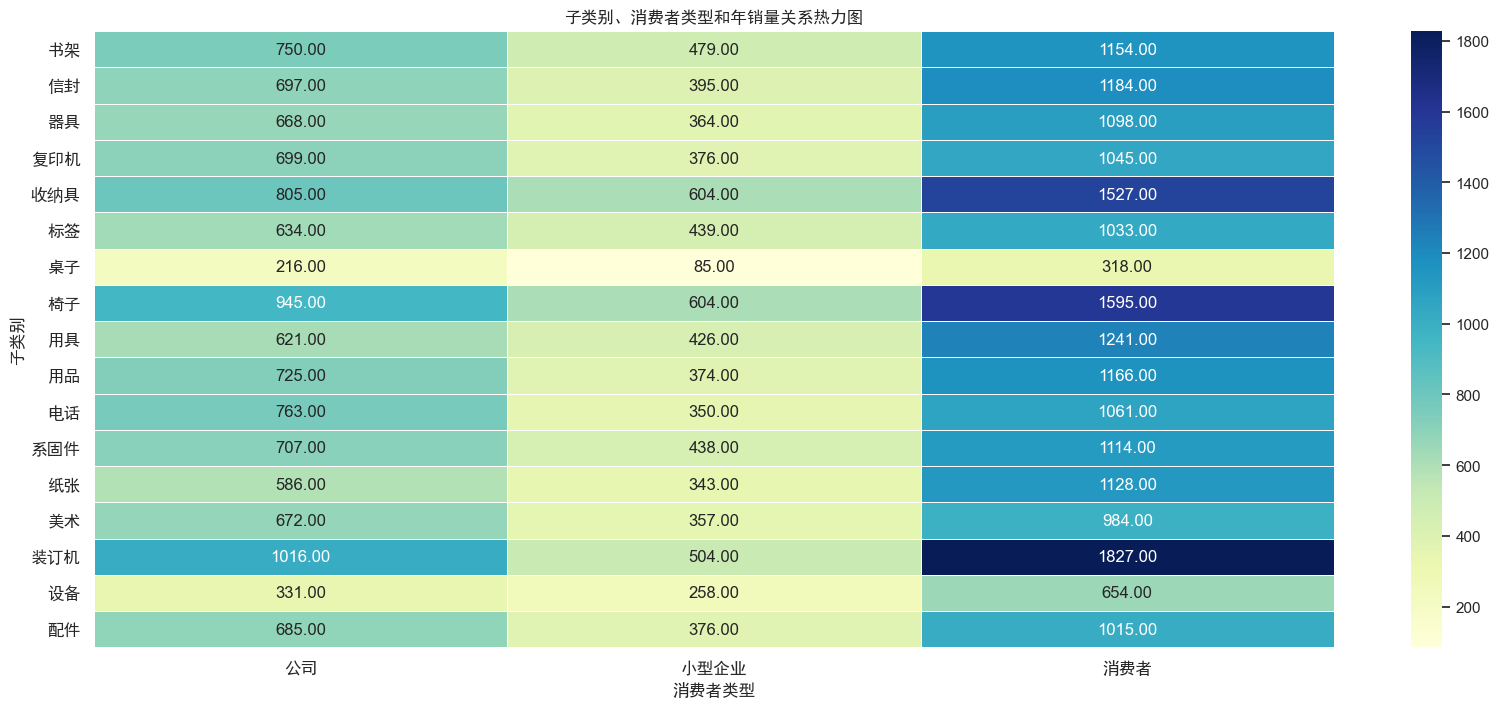

In [52]:
# 设置图形样式
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# 创建热力图
sns.heatmap(pivot_df,cmap='YlGnBu', annot=True, fmt=".2f",linecolor='white',linewidth=0.5)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font,rotation=0)

# 设置图形标题和轴标签
plt.title('子类别、消费者类型和年销量关系热力图', fontproperties=font)
plt.xlabel('消费者类型', fontproperties=font)
plt.ylabel('子类别', fontproperties=font)

# 显示图形
plt.show()